<a href="https://colab.research.google.com/github/mrzaid/dl-cnn-bootcamp/blob/main/dataaugmentationOPENCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 5s 0us/step


In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/16155980245_6ab8d7b888.jpg'),
 PosixPath('datasets/flower_photos/roses/394990940_7af082cf8d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/537625768_791e973b40.jpg'),
 PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/180613732_3a7aba0b80_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16643944275_3cd4cd966c.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6255593451_b8a3aa8f7a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5249566718_6109630c83_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3415176946_248afe9f32.jpg'),
 PosixPath('datasets/flower_photos/roses/2682566502_967e7eaa2a.jpg'),
 PosixPath('datasets/flower_photos/roses/15274443248_76b9f3eb24.jpg'),
 Posix

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [7]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16155980245_6ab8d7b888.jpg'),
 PosixPath('datasets/flower_photos/roses/394990940_7af082cf8d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/537625768_791e973b40.jpg'),
 PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/180613732_3a7aba0b80_n.jpg')]

In [9]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelions':list(data_dir.glob('dandelions/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelions':2,
    'sunflowers':3,
    'tulips':4,
}

In [10]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape


(334, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

In [13]:
x,y=[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])
    # you will get numbers o for rose 1 for dandelions
y[:5]
# simple plain python lists converted into numpy array
x=np.array(x)
y=np.array(y)






In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
num_classes=5
model=Sequential([
      layers.Conv2D(16,3,paffing='same',activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32,3,paffing='same',activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64,3,paffing='same',activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(), #cause dense network accepts single dimension array
      layers.Dense(128,activation='relu'),
      layers.Dense(num_classes,activation='softmax'),
      layers.Dense(num_classes,activation='softmax'), #logits false
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)
model.fit(x_train_scaled,y_train,epochs=30)
model.evaluate(x_test_scaled,y_test)
predictions=model.predict(x_test_scaled)


score=tf.nn.softmax(predictions[0])

np.argmax(np.array([0,78,123,8]))




In [23]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomContrast(0.39),
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(img_height,img_width,3)),

])

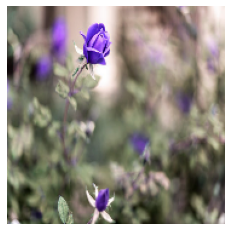

In [14]:
plt.axis('off')
plt.imshow(x[0])

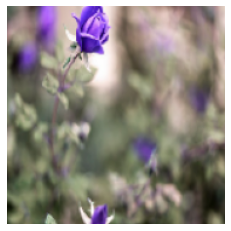

In [24]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

In [ ]:
num_classes=5
model=Sequential([
      data_augmentation,
      layers.Conv2D(16,3,paffing='same',activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32,3,paffing='same',activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64,3,paffing='same',activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.2),
      layers.Flatten(), #cause dense network accepts single dimension array
      layers.Dense(128,activation='relu'),
      layers.Dense(num_classes,activation='softmax'),
      layers.Dense(num_classes,activation='softmax'), #logits false
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)
model.fit(x_train_scaled,y_train,epochs=30)
model.evaluate(x_test_scaled,y_test)
predictions=model.predict(x_test_scaled)


score=tf.nn.softmax(predictions[0])

np.argmax(np.array([0,78,123,8]))